In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler

import pandas as pd
import numpy as np

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)


import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras as keras
from tensorflow.keras.layers.experimental import preprocessing

In [4]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [5]:
class Traindata:
    def __init__(self,fea,lab,head=None):
        self.features = fea
        self.labels = lab
        self.header = head

In [8]:
class Traindata:
    def __init__(self,fea,lab,head=None):
#         self.features = np.expand_dims(fea, axis=2)
        self.features = fea
        self.labels = keras.utils.to_categorical(lab - 1, num_classes= 2)
        self.number_of_features = len(self.features[1]) 

In [56]:
fea = np.load('Data/20201126-all-clean-augmented/features.npy')
lab = np.load('Data/20201126-all-clean-augmented/label.npy')
allClean = Traindata(fea,lab)

fea = np.load('Data/train2_augmented2/features.npy')
lab = np.load('Data/train2_augmented2/label.npy')
train2 = Traindata(fea,lab)

fea = np.load('Data/mijerry/features.npy')
lab = np.load('Data/mijerry/label.npy')
mijerry = Traindata(fea,lab)

fea = np.load('Data/test/features.npy')
lab = np.load('Data/test/label.npy')
test = Traindata(fea,lab)

fea = np.load('Data/mingtest/features.npy')
lab = np.load('Data/mingtest/label.npy')
mingtest = Traindata(fea,lab)

In [17]:
print(lab)

[1. 1. 0. 0. 0. 0. 0. 0. 0.]


In [5]:
np.random.seed(7)

In [57]:
print(test.number_of_features)
print(test.features.shape)
print(test.labels.shape)

23
(57, 23)
(57, 2)


In [42]:
# import numpy as np
# import keras 
# from keras.models import Sequential 
# from keras.layers import Dense, Dropout, Activation
# from keras.layers import Embedding
# from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
# from keras.optimizers import SGD
# from sklearn.model_selection import train_test_split
# # Neural Network Construction
# model = Sequential()

# # Neural Network Architecture
# # Using 1D Convolutions (approriate for audio files)

# # first layer has 64 convolution filters 
# model.add(Conv1D(64, 3, activation='relu', padding='same', input_shape = (23, 1))) 
# model.add(Conv1D(64, 3, activation='relu'))
# model.add(MaxPooling1D(3))
# model.add(Conv1D(32, 3, padding='same', activation='relu'))
# model.add(Conv1D(32, 3, padding='same', activation='relu'))
# model.add(GlobalAveragePooling1D())
# model.add(Dropout(0.5))

# model.add(Dense(2, activation='softmax'))

# model.compile(loss='binary_crossentropy',
#               optimizer='rmsprop',
#               metrics=['accuracy'])

In [81]:
# coding= UTF-8
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split

# Neural Network Architecture
model = Sequential() # Define Sequential model

# Using relu on the first two layers and softmax on the output layer

# 1st Layer
#N neurons, Number_Fatures-dimensional vectors
model.add(Dense(512, input_dim=23, activation='relu')) #32, 64, 128, 256, 512, 1024
model.add(Dropout(0.5))

# 2nd Layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

# 3rd Layer. Output 3 neurons corresponding the number of classes
# The sigmoid function is used for the two-class logistic regression, 
# whereas the softmax function is used for the multiclass logistic regression 
model.add(Dense(2, activation='softmax'))

# Model Compilation. Loss for multi-class classification problem
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
rmsprop = 'rmsprop'
adam = 'adam'
model.compile(loss='binary_crossentropy',
              optimizer= rmsprop, #rmsprop better than sgd
              metrics=['accuracy'])


In [82]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 512)               12288     
_________________________________________________________________
dropout_20 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_21 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 2)                 1026      
Total params: 275,970
Trainable params: 275,970
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = keras.Sequential([

    # input layer
    keras.layers.Flatten(input_shape=(23,)),
    # 1st dense layer
    keras.layers.Dense(160, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.5),
    # 2nd dense layer
    keras.layers.Dense(80, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.5),
    # output layer
    keras.layers.Dense(1, activation='sigmoid')
])

    # compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
#               loss = tf.losses.MeanSquaredError(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train2.features, train2.labels, validation_data=(test.features, test.labels),
          epochs=300,batch_size=64,shuffle=True,
          verbose=2
)

Confusion matrix, without normalization
[[ 1 14]
 [ 3 39]]


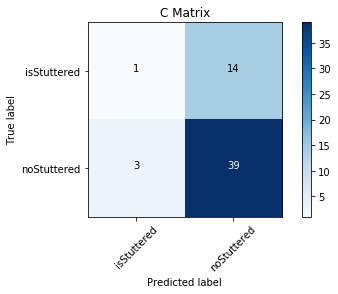

In [79]:
from sklearn.metrics import multilabel_confusion_matrix
inputName = test
inputFeatures = inputName.features
inputLabels = inputName.labels
predictions = model.predict(x=inputFeatures, batch_size=10,verbose=0)
rounded_predictions = np.round(predictions)
# multilabel_confusion_matrix(inputLabels, rounded_predictions)
cm = confusion_matrix(y_true=np.argmax(inputLabels, axis=-1), y_pred=np.argmax(predictions, axis=-1))
cm_plot_labels = ['isStuttered','noStuttered']
plot_confusion_matrix(cm=cm ,classes=cm_plot_labels, title='C Matrix')

In [6]:
def prepare_data(link):
    dataset_name = link.split('/')[-1]
    file = tf.keras.utils.get_file(dataset_name,link)
    CSV_HEADER = np.arange(80)
    CSV_HEADER = np.hstack((CSV_HEADER,['isStuttered','isSuccess']))
    label = ['isStuttered','isSuccess']
    dataframe = pd.read_csv(file, names=CSV_HEADER.tolist())
    isSuccess = dataframe.pop('isSuccess')
    labels = dataframe.pop('isStuttered')
    features = dataframe
#     scaler = MinMaxScaler()
#     scaler.fit(features)
#     normalised = scaler.transform(features)
#     new_y = keras.utils.to_categorical(labels, num_classes= 2)
    return (features,labels,CSV_HEADER)                      

In [7]:
x,y,head = prepare_data('https://raw.githubusercontent.com/ming0520/training_data/main/20201126/20201126-cleanonly.csv')
cleanOnly = Traindata(x,y,head)
x,y,head = prepare_data('https://raw.githubusercontent.com/ming0520/training_data/main/20201221/20201221.csv')
IBM = Traindata(x,y,head)
x,y,head = prepare_data('https://raw.githubusercontent.com/ming0520/fyp2-data-20201126-fortrain/main/dataset_20201126.csv')
augmented = Traindata(x,y,head)
x,y,head = prepare_data('https://raw.githubusercontent.com/ming0520/training_data/main/test/test.csv')
test = Traindata(x,y,head)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(test.features)
print(scaler.transform(test.features))
print(test.features)

In [8]:
def prepare_data_from_file(link):
    dataset_name = link.split('/')[-1]
    file = link
    CSV_HEADER = np.arange(80)
    CSV_HEADER = np.hstack((CSV_HEADER,['isStuttered','isSuccess']))
    label = ['isStuttered','isSuccess']
    dataframe = pd.read_csv(file, names=CSV_HEADER.tolist())
    isSuccess = dataframe.pop('isSuccess')
    isStuttered = dataframe.pop('isStuttered')
    labels = isStuttered
    features = dataframe
    scaler = MinMaxScaler()
    scaler.fit(features)
    normalised = scaler.transform(features)
#     new_y = keras.utils.to_categorical(labels, num_classes= 2)
    return (features,labels,CSV_HEADER)                      

In [12]:
x,y,head = prepare_data_from_file('Data/train2_augmented2/train_11050.csv')
new = Traindata(x,y,head)
print(new.labels.shape)
print(new.labels)
x,y,head = prepare_data_from_file('Data/mijerry/train_11025.csv')
mijerry = Traindata(x,y,head)
x,y,head = prepare_data_from_file('Data/mingtest/train_11025.csv')
mingtest = Traindata(x,y,head)
x,y,head = prepare_data_from_file('Data/train2_augmented2/train_11025.csv')
newnew = Traindata(x,y,head)
x,y,head = prepare_data_from_file('Data/test/newtest_11025.csv')
newtest = Traindata(x,y,head)

(6833,)
0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
6828    0.0
6829    0.0
6830    0.0
6831    0.0
6832    0.0
Name: isStuttered, Length: 6833, dtype: float64


In [ ]:
model = tf.keras.Sequential([
  layers.Flatten(input_shape=(augmented.features.shape[1],)),
  layers.Dense(160,activation='relu'),
  layers.Dense(80,activation='relu'),
  layers.Dense(1,activation='sigmoid')
])

model.compile(
    loss = tf.losses.MeanSquaredError(),
    optimizer = tf.optimizers.Adam(learning_rate=0.00001),
    metrics=['accuracy']
    )

# model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.00001),
#               loss='binary_crossentropy',
#               metrics=['accuracy'])


# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model = tf.keras.Sequential([

    # input layer
    layers.Flatten(input_shape=(augmented.features.shape[1],)),

    # 1st dense layer
    layers.Dense(320, activation='relu'),

    # 2nd dense layer
    layers.Dense(160, activation='relu'),

    # 3rd dense layer
    layers.Dense(80, activation='relu'),

    # output layer
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss = tf.losses.MeanSquaredError(),
    optimizer = tf.optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy']
    )

In [ ]:
model = keras.Sequential([

    # input layer
    keras.layers.Flatten(input_shape=(80,)),
    # 1st dense layer
    keras.layers.Dense(160, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.5),
    # 2nd dense layer
    keras.layers.Dense(80, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.5),
    # output layer
    keras.layers.Dense(1, activation='sigmoid')
])

    # compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
              loss = tf.losses.MeanSquaredError(),
#               loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model = keras.Sequential([

    # input layer
    keras.layers.Flatten(input_shape=(80,)),
    # 1st dense layer
    keras.layers.Dense(160, activation='relu'
                       , kernel_regularizer=keras.regularizers.l2(0.001)
                      ),
    keras.layers.Dropout(0.5),
    # 2nd dense layer
    keras.layers.Dense(80, activation='relu'
                       , kernel_regularizer=keras.regularizers.l2(0.001)
                      ),
    keras.layers.Dropout(0.5),
    # output layer
    keras.layers.Dense(1, activation='sigmoid')
])
rmsprop = 'rmsprop'
    # compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
#               loss = tf.losses.MeanSquaredError(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
np.random.seed(7)

In [ ]:
# Neural Network Architecture
model = keras.Sequential() # Define Sequential model

# Using relu on the first two layers and softmax on the output layer

# 1st Layer
#N neurons, Number_Fatures-dimensional vectors
model.add(keras.layers.Dense(512, input_shape=(80,), activation='tanh'
#                             , kernel_regularizer=keras.regularizers.l2(0.001)
                            )) #32, 64, 128, 256, 512, 1024
# model.add(keras.layers.Dropout(0.3))

# 2nd Layer
model.add(keras.layers.Dense(512,input_dim=80, activation='tanh'
#                             , kernel_regularizer=keras.regularizers.l2(0.001)
                            ))
# model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.BatchNormalization(axis=1)),

# 3rd Layer. Output 3 neurons corresponding the number of classes
# The sigmoid function is used for the two-class logistic regression, 
# whereas the softmax function is used for the multiclass logistic regression 
model.add(keras.layers.Dense(1, activation='sigmoid'))

# Model Compilation. Loss for multi-class classification problem
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
rmsprop = 'rmsprop'
adam2 = keras.optimizers.Adam(learning_rate=0.001)
rmsprop2 = tf.keras.optimizers.RMSprop(
    learning_rate=0.0001,
    rho=0.9,
    momentum=0.0001,
    epsilon=1e-07,
    centered=False,
    name="RMSprop"
)
mse = tf.losses.MeanSquaredError()
adam = 'adam'
bc = 'binary_crossentropy'
model.compile(loss=mse,
              optimizer= adam2, #rmsprop better than sgd
              metrics=['accuracy'])

In [ ]:
model = keras.Sequential([
keras.layers.Dense(64, activation=tf.nn.relu, 
                   input_shape=(80,)),
keras.layers.Dense(64, activation=tf.nn.relu),
keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)

model.compile(loss='mse',
            optimizer=optimizer,
            metrics=['mae'])

In [ ]:
# from keras.applications.resnet50 import ResNet50
# model = ResNet50(weights='imagenet')

# Model(
#     inputs=model.input,
#     outputs=[
#         model.get_layer('res5a_branch1').output,
#         model.get_layer('activation_47').output,
#     ]
# )

In [ ]:
model.summary()

In [ ]:

history = model.fit(newnew.features, newnew.labels, validation_data=(newtest.features, newtest.labels),
          # epochs=1200,batch_size=1000,shuffle=True,
          epochs=1200,batch_size=32,shuffle=True,
          verbose=2
)

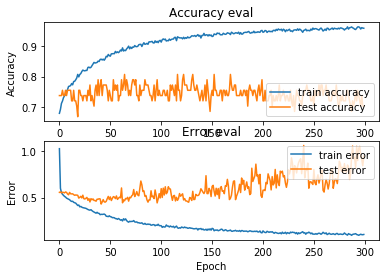

In [83]:
 plot_history(history)

In [ ]:
filepath = 'model-ep{epoch:03d}-loss{loss:.3f}-acc{accuracy:.3f}-val_loss{val_loss:.3f}-val_acc{val_accuracy:.3f}.h5'
# early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
history = model.fit(newnew.features, newnew.labels, validation_data=(newtest.features, newtest.labels),
                    callbacks=[checkpoint],
          # epochs=1200,batch_size=1000,shuffle=True,
          epochs=1200,batch_size=32,shuffle=True,
          verbose=2
)

In [ ]:
model = tf.keras.models.load_model('20201227-1101-80-21.h5')

In [14]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

In [ ]:
 plot_history(history)

In [ ]:
inCase = test
score, acc = model.evaluate(inCase.features, inCase.labels,
                            batch_size=256)
print('Test score:', score)
print('Test accuracy:', acc)

In [ ]:
# model.save('20201228-0913-MLP1.2k-ADAM-BC-relu-sigmoid-75-96.h5')

In [15]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

In [57]:
model = tf.keras.models.load_model('Model/newmodel/20201227-1123-MLP-RMSprop-Default-80-123.h5')

In [61]:
model = tf.keras.models.load_model('Model/mymodel/mymodel_78_18.h5')

In [64]:
model = tf.keras.models.load_model('test1/20201228-0824-MLP-ADAM-MSE-relu-sigmoid-77-23.h5')

In [65]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 80)                0         
_________________________________________________________________
dense_48 (Dense)             (None, 160)               12960     
_________________________________________________________________
dropout_9 (Dropout)          (None, 160)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 80)                12880     
_________________________________________________________________
dropout_10 (Dropout)         (None, 80)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 81        
Total params: 25,921
Trainable params: 25,921
Non-trainable params: 0
_________________________________________________

The current best model is
20201227-1123-MLP-RMSprop-Default-80-123.h5

Model/mymodel/mymodel_with_technique7_81-51.h5

mymodel_with_technique_mql_20201226_80-24.h5

Model/mymodel/mymodel_2k.h5

Confusion matrix, without normalization
[[3246  246]
 [ 448 2982]]
28/28 [==============================] - 0s 1ms/step - loss: 0.1307 - accuracy: 0.8997
Test score: 0.13072431087493896
Test accuracy: 0.8997399806976318


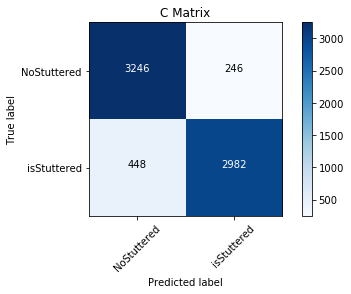

In [70]:
inputClass = augmented
inputFeatures = inputClass.features
inputLabels = inputClass.labels
predictions = model.predict(x=inputFeatures, batch_size=10,verbose=0)
rounded_predictions = np.round(predictions)
yt= inputLabels.to_numpy()
yt = yt.reshape(yt.shape[0],1)
yTrue = np.round(yt)
# yTrue = yTrue.astype(dtype=np.float32)
cm = confusion_matrix(y_true=yTrue, y_pred=rounded_predictions)
cm_plot_labels = ['NoStuttered','isStuttered']
plot_confusion_matrix(cm=cm ,classes=cm_plot_labels, title='C Matrix')
score, acc = model.evaluate(inputFeatures, inputLabels,
                            batch_size=256)
print('Test score:', score)
print('Test accuracy:', acc)

https://github.com/musikalkemist/DeepLearningForAudioWithPython/blob/master/13-%20Implementing%20a%20neural%20network%20for%20music%20genre%20classification/code/mlp_genre_classifier.py

In [ ]:
model = keras.Sequential([

    # input layer
    layers.Flatten(input_shape=(augmented.features.shape[1],)),

    # 1st dense layer
    keras.layers.Dense(512, activation='relu'),

    # 2nd dense layer
    keras.layers.Dense(256, activation='relu'),

    # 3rd dense layer
    keras.layers.Dense(64, activation='relu'),

    # output layer
    keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
model.fit(augmented.features, augmented.labels, validation_split=0.1,
          # epochs=1200,batch_size=1000,shuffle=True,
          epochs=1200,batch_size=256,shuffle=True,
          verbose=2
)

In [50]:

# coding= UTF-8
import numpy as np 
import sklearn
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform


In [ ]:
np.random.seed(7)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(newnew.features, newnew.labels, test_size=0.3) 

In [58]:
x1,x2,y1,y2 = train_test_split(test.features, test.labels,shuffle=False,test_size=0.000001) 

In [54]:
svm_clf = SVC(random_state=80,C=1,gamma = 0.0001, kernel='rbf', decision_function_shape="ovr") 

In [63]:
svm_clf.fit(X_train, y_train)

SVC(C=1, gamma=0.0001, random_state=80)

In [64]:
acc = svm_clf.score(X_test, y_test)
print("Final accuracy = %0.4f" %acc)

Final accuracy = 0.6785


In [69]:
y_predict = svm_clf.predict(X_test)
label_classes = np.array(['isSuccess','isStuttered'])

In [70]:
y_predict
print(y_predict)

[0. 0. 0. ... 0. 0. 0.]


In [71]:
prediction_decoded = label_classes[y_predict.astype((int))]
actual_value_decoded = label_classes[y_test.astype((int))]

In [72]:
pd.crosstab(actual_value_decoded, prediction_decoded)

col_0,isStuttered,isSuccess
row_0,,
isStuttered,361,652
isSuccess,7,1030
